# WhatsApp Chat Analysis

**Step 1.** Declare RegExp patterns that you want to remove from the chat file. 

In [2]:
import re

mediaPattern = r"(\<Media omitted\>)" # Because it serves no purpose
regexMedia = re.compile(mediaPattern, flags=re.M)

dateAndTimepattern = r"(\d+\/\d+\/\d+)(,)(\s)(\d+:\d+)(\s)(-)(\s\w+)*(:)"
regexDate = re.compile(dateAndTimepattern, flags=re.M)

**Step 2.** Define a function that will remove the artefacts, and return the chat file split into lines.

In [15]:
def cleanText(filename):    
    chat = open(filename ,encoding="utf8")
    chatText = chat.read()
    chat.close()

    # 01/09/17, 11:34 PM - Amfa:

    """
    Removes the matches and 
    replace them with an empty string
    """
    chatText = regexMedia.sub("", chatText)
    chatText = regexDate.sub("", chatText)

    
    lines = []

    for line in chatText.splitlines():
        if line.strip() is not "": # If it's empty, we don't need it
            lines.append(line.strip())

    return lines

In [4]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**Step 3.** Import Dependencies for the actual shenanigans.

In [5]:
import sys
import matplotlib.pyplot as plt
import nltk
from utilities import cleanText 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

**Step 4.** Define an analyze method that takes in the name of the chat file, and then performs magic (through code.)

In [16]:
def analyze(name):
    linesList = cleanText(name + '.txt')
    neutral, negative, positive = 0, 0, 0

    for index, sentence in enumerate(linesList):
        if re.match(r'^[\w]', sentence) is None:
            continue
        scores = sentiment_analyzer.polarity_scores(sentence)
        scores.pop('compound', None)

        maxAttribute = max(scores, key=lambda k: scores[k])

        if maxAttribute == "neu":
            neutral += 1
        elif maxAttribute == "neg":
            negative += 1
        else:
            positive += 1

    total = neutral + negative + positive
    print("Negative: {0}% | Neutral: {1}% | Positive: {2}%".format(
        negative*100/total, neutral*100/total, positive*100/total))

    labels = 'Neutral', 'Negative', 'Positive'
    sizes = [neutral, negative, positive]
    colors = ['#00bcd7', '#F57C00', '#CDDC39']

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', startangle=140)

    plt.axis('equal')
    plt.title("Sentiment Analysis - Chat with {0}".format(name.capitalize()))
    plt.show()
    return linesList

In [7]:
%matplotlib inline

Negative: 1.1663750728984421% | Neutral: 97.33399983337499% | Positive: 1.4996250937265683%


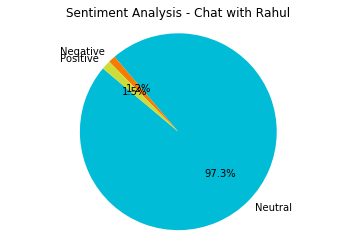

In [30]:
linesList=analyze("Rahul")

In [19]:
import pandas as pd 
import numpy as np

In [31]:
f= open("cleandata.txt","w+",encoding="utf8")
for i in linesList:
     f.write(i + " ")
f.close()

In [34]:
import wordcloud


ModuleNotFoundError: No module named 'wordcloud'

In [14]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
def wordcount():
    chat = open("cleandata.txt" ,encoding="utf8")
    default_stopwords = set(nltk.corpus.stopwords.words('english'))
    words = nltk.word_tokenize(chat.read())
    words = [word for word in words if not word.isnumeric()]
    words = [word.lower() for word in words]
    fdist = nltk.FreqDist(words)
    i=1
    for word, frequency in fdist.most_common(50):
        print(u'{}.){}:{}'.format(i,word, frequency))
        i+=1

In [38]:
wordcount()

1.)..:2427
2.)?:1915
3.)heh:1670
4.)bhai:1617
5.)nahi:1491
6.)hai:1336
7.)bhi:1171
8.)nai:1029
9.)toh:1012
10.)...:1002
11.)mein:997
12.)na:959
13.)kya:858
14.)ko:733
15.)mai:725
16.)bc:723
17.)ka:669
18.)tha:645
19.)re:626
20.)kuch:617
21.)woh:602
22.)tu:586
23.)se:526
24.)ki:516
25.)baat:448
26.)ky:405
27.)tho:393
28.)sab:390
29.)k:389
30.)raha:376
31.)meko:375
32.)hih:374
33.)fir:362
34.)hi:362
35.)usko:352
36.)pe:329
37.)aur:329
38.)ke:327
39.)wo:325
40.)ye:311
41.)bola:300
42.)abhi:297
43.)kar:290
44.)lavde:278
45.)kiya:277
46.)hua:272
47.)bahoot:268
48.)kyu:266
49.)kal:253
50.)abh:249
